<a href="https://colab.research.google.com/github/zulfa755/Differencing-KPSS-on-US-Female-Employment/blob/main/Differencing_Analysis_of_US_Female_Labor_Force_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PythonTsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot
from PythonTsa.plot_acf_pacf import acf_pacf_fig

In [ ]:
# Membaca file data
x = pd.read_csv('/content/USFemalesAged20+Job1948-81.csv', header=None)
dates = pd.date_range(start='1948-01', periods=len(x), freq='ME')
x = pd.Series(x[0].values, index=dates) # indeks series

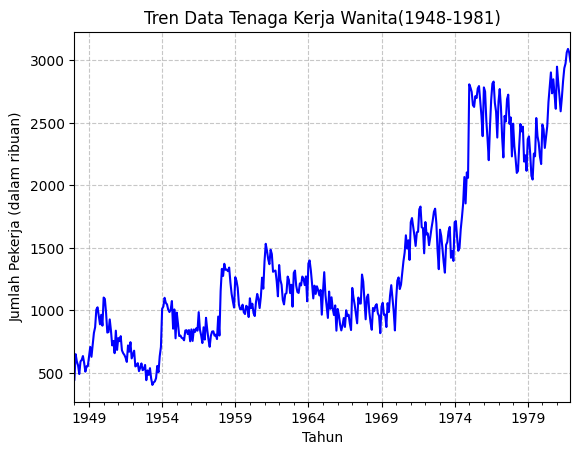

In [ ]:
# Plot data keseluruhan
x.plot(color='b', linewidth=1.5)
plt.title("Tren Data Tenaga Kerja Wanita(1948-1981)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pekerja (dalam ribuan)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

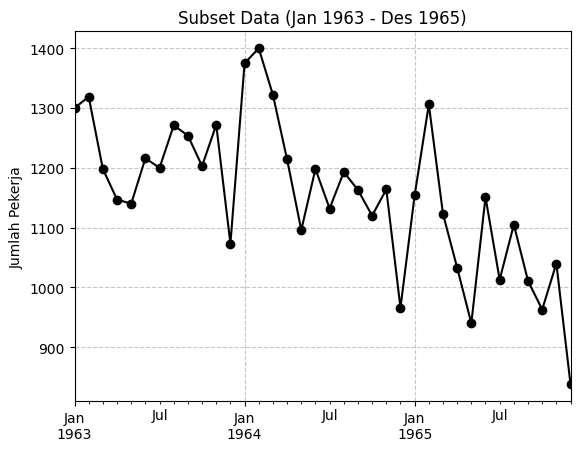

In [ ]:
# Plot subset data
x['1963-01':'1965-12'].plot(marker='o', linestyle='-', color='k')
plt.title("Subset Data (Jan 1963 - Des 1965)")
plt.ylabel("Jumlah Pekerja")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

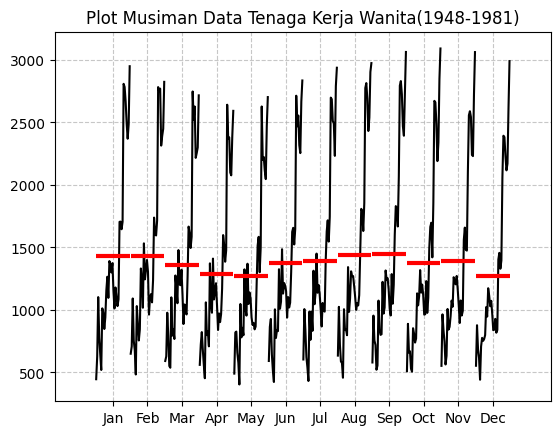

In [ ]:
#Menampilkan plot musiman
month_plot(x)
plt.title("Plot Musiman Data Tenaga Kerja Wanita(1948-1981)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

1949-02-28   -124.0
1949-03-31    -21.0
1949-04-30    126.0
1949-05-31    166.0
1949-06-30    -56.0
Freq: ME, dtype: float64


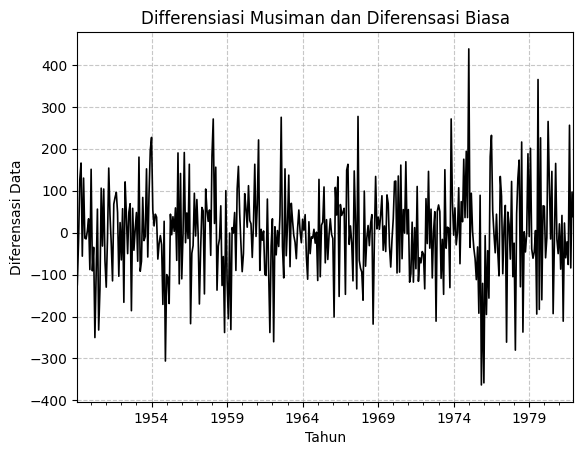

In [ ]:
# Melakukan diferensiasi musiman dan diferensiasi biasa
dDx = sm.tsa.statespace.tools.diff(x, k_diff=1, k_seasonal_diff=1, seasonal_periods=12)
print (dDx.head())
dDx.plot(color='k', linewidth=1.2)
plt.title("Differensiasi Musiman dan Diferensasi Biasa")
plt.xlabel("Tahun")
plt.ylabel("Diferensasi Data")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


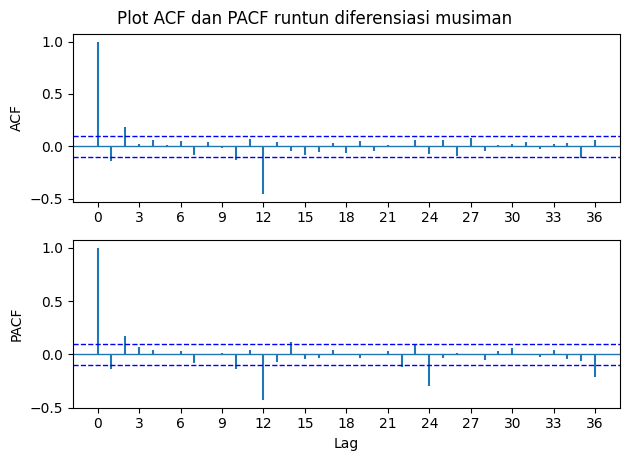

In [ ]:
# Plot ACF dan PACF
fig = acf_pacf_fig(dDx.dropna(), both=True, lag=36) # Call dropna() method on dDx Series
plt.suptitle("Plot ACF dan PACF runtun diferensiasi musiman", y=0.95)
plt.tight_layout()
plt.show()

In [ ]:
# Uji KPSS untuk stasionaritas
result = sm.tsa.kpss(dDx.dropna(), regression='c', nlags='auto')
print(result)

(np.float64(0.022502332513746816), np.float64(0.1), 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


<ipython-input-24-de3c67c0fd0e>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = sm.tsa.kpss(dDx.dropna(), regression='c', nlags='auto')
